In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

In [2]:
#load the dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\Temparature\Regression\Dataset\data.csv")

In [2]:
#displaying the first five rows
df.head()

NameError: name 'df' is not defined

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4137 entries, 0 to 4136
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              4137 non-null   object 
 1   Time                              4137 non-null   object 
 2   CO2_(dinning-room)                4137 non-null   float64
 3   CO2_room                          4137 non-null   float64
 4   Relative_humidity_(dinning-room)  4137 non-null   float64
 5   Relative_humidity_room            4137 non-null   float64
 6   Lighting_(dinning-room)           4137 non-null   float64
 7   Lighting_room                     4137 non-null   float64
 8   Meteo_Rain                        4137 non-null   float64
 9   Meteo_Sun_dusk                    4137 non-null   float64
 10  Meteo_Wind                        4137 non-null   float64
 11  Meteo_Sun_light_in_west_facade    4137 non-null   float64
 12  Meteo_

In [5]:
df.describe()

,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,Meteo_Sun_light_in_west_facade,Meteo_Sun_light_in_east_facade,Meteo_Sun_light_in_south_facade,Meteo_Sun_irradiance,Outdoor_relative_humidity_Sensor,Day_of_the_week,Indoor_temperature_room
count,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000
mean,206.599835,209.611623,42.389879,44.546069,28.970248,42.335496,0.038756,335.094312,1.304623,14749.149509,13566.284958,19857.184071,232.203649,53.251632,3.962549,18.833407
std,22.763114,24.183477,7.215405,8.297436,25.684356,42.602571,0.187128,304.513038,1.223829,25306.450482,23311.852941,29494.598354,312.460713,13.511063,1.988923,2.702312
min,187.339000,188.907000,26.173300,27.256000,10.740000,11.328000,0.000000,0.606667,0.000000,0.000000,0.000000,0.000000,-4.164670,22.246700,1.000000,11.076000
25%,200.228000,201.707000,36.088000,38.446700,11.540700,13.509300,0.000000,0.650000,0.168667,0.000000,0.000000,0.000000,-3.250670,42.650700,2.000000,17.067300
50%,205.131000,208.907000,42.776000,44.802700,14.126700,22.085300,0.000000,612.821000,0.962667,752.640000,1025.020000,645.120000,11.246000,54.717300,4.000000,19.000797
75%,210.016000,212.331000,47.584000,50.301300,40.034700,55.064000,0.000000,619.712000,2.225330,14627.500000,12907.200000,33263.600000,479.552000,63.128000,6.000000,20.786062
max,594.389000,609.237000,60.957300,62.594700,111.797000,162.965000,1.000000,625.003000,6.321330,95278.400000,92367.500000,95704.400000,1094.660000,83.805300,7.000000,24.944000


In [6]:
df.isnull().sum()

Date                                0
Time                                0
CO2_(dinning-room)                  0
CO2_room                            0
Relative_humidity_(dinning-room)    0
Relative_humidity_room              0
Lighting_(dinning-room)             0
Lighting_room                       0
Meteo_Rain                          0
Meteo_Sun_dusk                      0
Meteo_Wind                          0
Meteo_Sun_light_in_west_facade      0
Meteo_Sun_light_in_east_facade      0
Meteo_Sun_light_in_south_facade     0
Meteo_Sun_irradiance                0
Outdoor_relative_humidity_Sensor    0
Day_of_the_week                     0
Indoor_temperature_room             0
dtype: int64

## univariate analysis

<AxesSubplot:xlabel='Indoor_temperature_room', ylabel='Count'>

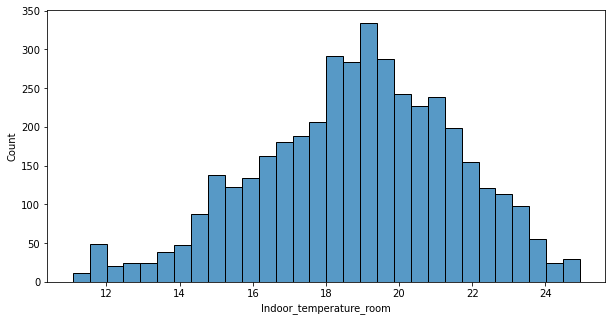

In [7]:
plt.figure(figsize =(10,5))
sns.histplot(data = df, x='Indoor_temperature_room',)

## bi variate analysis


<AxesSubplot:xlabel='Relative_humidity_room', ylabel='Relative_humidity_(dinning-room)'>

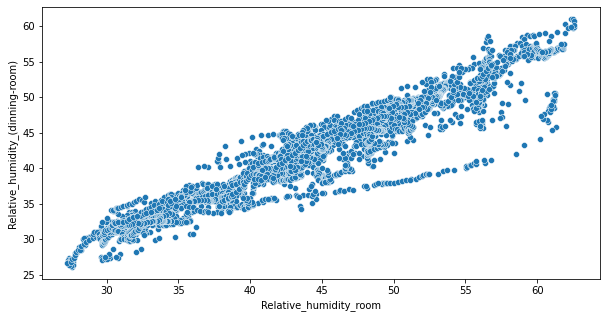

In [8]:
plt.figure(figsize =(10,5))
sns.scatterplot(data = df, x = 'Relative_humidity_room', y = 'Relative_humidity_(dinning-room)')

## multivariate analysis

<AxesSubplot:xlabel='CO2_room', ylabel='Relative_humidity_(dinning-room)'>

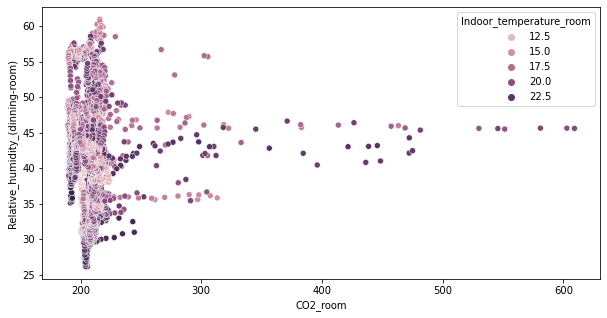

In [9]:
plt.figure(figsize =(10,5))
sns.scatterplot(data = df, x = 'CO2_room', y = 'Relative_humidity_(dinning-room)', hue='Indoor_temperature_room')

In [10]:
df.corr()

,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,Meteo_Sun_light_in_west_facade,Meteo_Sun_light_in_east_facade,Meteo_Sun_light_in_south_facade,Meteo_Sun_irradiance,Outdoor_relative_humidity_Sensor,Day_of_the_week,Indoor_temperature_room
CO2_(dinning-room),1.000000,0.921147,0.007569,-0.006710,0.210973,0.201988,-0.077145,0.118342,0.016163,0.139729,0.024964,0.266481,0.202645,-0.024068,-0.109505,0.051476
CO2_room,0.921147,1.000000,-0.016113,-0.015423,0.187347,0.171437,-0.079018,0.096919,-0.004526,0.111899,0.013415,0.238168,0.172644,-0.010945,-0.101870,0.037898
Relative_humidity_(dinning-room),0.007569,-0.016113,1.000000,0.953278,-0.111464,-0.064680,0.031794,-0.060707,-0.300701,-0.092636,-0.048443,-0.005352,-0.087956,0.735952,-0.020140,-0.272333
Relative_humidity_room,-0.006710,-0.015423,0.953278,1.000000,-0.170723,-0.125465,0.111310,-0.094034,-0.308020,-0.128181,-0.074913,-0.070145,-0.152502,0.828931,-0.046759,-0.401047
Lighting_(dinning-room),0.210973,0.187347,-0.111464,-0.170723,1.000000,0.934732,-0.109877,0.637038,0.569098,0.434846,0.432066,0.880722,0.955442,-0.301732,0.026073,0.070854
Lighting_room,0.201988,0.171437,-0.064680,-0.125465,0.934732,1.000000,-0.111371,0.631014,0.476659,0.300701,0.583702,0.938664,0.922889,-0.236751,0.031790,-0.016774
Meteo_Rain,-0.077145,-0.079018,0.031794,0.111310,-0.109877,-0.111371,1.000000,-0.019014,0.134216,-0.108825,-0.103857,-0.125103,-0.134381,0.286478,-0.080620,-0.202908
Meteo_Sun_dusk,0.118342,0.096919,-0.060707,-0.094034,0.637038,0.631014,-0.019014,1.000000,0.519055,0.544835,0.545308,0.632599,0.707491,-0.245173,0.005300,0.057277
Meteo_Wind,0.016163,-0.004526,-0.300701,-0.308020,0.569098,0.476659,0.134216,0.519055,1.000000,0.589852,0.096903,0.431533,0.619357,-0.443060,-0.020662,0.296077
Meteo_Sun_light_in_west_facade,0.139729,0.111899,-0.092636,-0.128181,0.434846,0.300701,-0.108825,0.544835,0.589852,1.000000,0.096553,0.389232,0.589915,-0.360713,0.009365,0.352207


<AxesSubplot:>

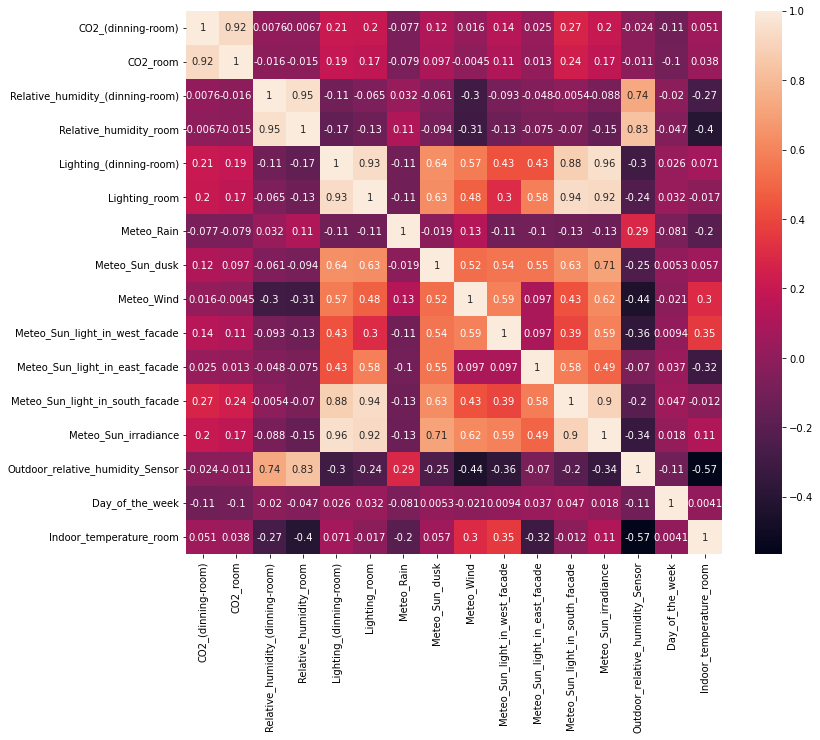

In [11]:
plt.figure(figsize =(12,10))
sns.heatmap(df.corr(), annot = True)

In [12]:
df.drop(['Date','Time','CO2_(dinning-room)', 'Relative_humidity_(dinning-room)','Lighting_(dinning-room)', 'Meteo_Sun_dusk','Meteo_Sun_light_in_east_facade','Meteo_Sun_light_in_south_facade', 'Meteo_Sun_irradiance','Day_of_the_week'], axis = 1,inplace = True)

In [13]:
df

,CO2_room,Relative_humidity_room,Lighting_room,Meteo_Rain,Meteo_Wind,Meteo_Sun_light_in_west_facade,Outdoor_relative_humidity_Sensor,Indoor_temperature_room
0,221.920,42.4150,113.5200,0.0,1.426250,9690.24,48.3750,17.827500
1,220.363,42.2453,113.6050,0.0,1.592000,11022.00,47.8080,18.120700
2,218.933,42.2267,113.6000,0.0,1.891330,13960.50,47.4320,18.436700
3,217.045,42.0987,113.3440,0.0,1.828000,18511.20,47.0240,18.751300
4,216.080,42.0686,113.0340,0.0,2.360710,26349.00,45.4743,19.041400
...,...,...,...,...,...,...,...,...
4132,201.963,44.9813,24.3493,0.0,0.295333,6636.54,58.9920,17.513590
4133,202.091,44.9413,30.9693,0.0,0.174000,11818.30,58.6213,17.475588
4134,201.739,44.9333,32.1933,0.0,0.246000,10836.30,57.6960,17.399487
4135,200.597,44.7013,38.3507,0.0,0.181333,11722.10,56.8613,17.262642


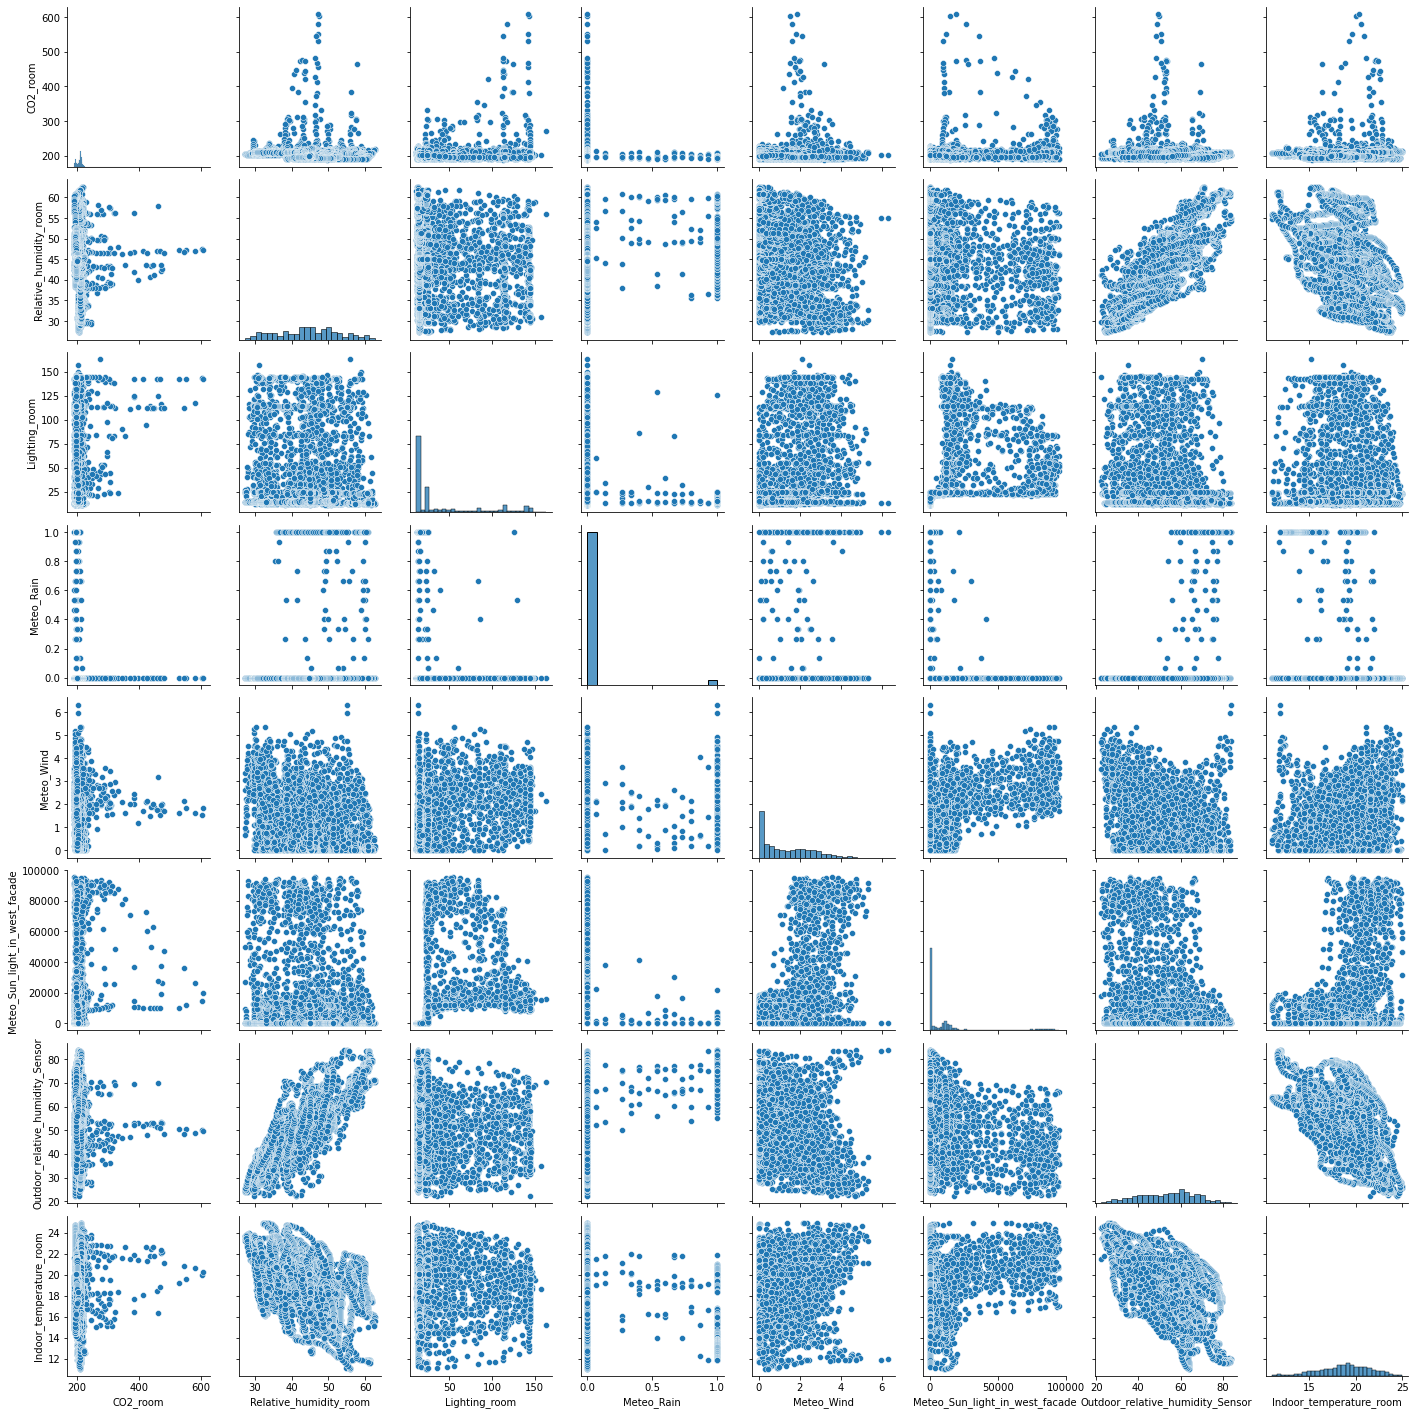

In [14]:
sns.pairplot(df)

In [15]:
x = df.drop('Indoor_temperature_room', axis = 1)

In [16]:
x

,CO2_room,Relative_humidity_room,Lighting_room,Meteo_Rain,Meteo_Wind,Meteo_Sun_light_in_west_facade,Outdoor_relative_humidity_Sensor
0,221.920,42.4150,113.5200,0.0,1.426250,9690.24,48.3750
1,220.363,42.2453,113.6050,0.0,1.592000,11022.00,47.8080
2,218.933,42.2267,113.6000,0.0,1.891330,13960.50,47.4320
3,217.045,42.0987,113.3440,0.0,1.828000,18511.20,47.0240
4,216.080,42.0686,113.0340,0.0,2.360710,26349.00,45.4743
...,...,...,...,...,...,...,...
4132,201.963,44.9813,24.3493,0.0,0.295333,6636.54,58.9920
4133,202.091,44.9413,30.9693,0.0,0.174000,11818.30,58.6213
4134,201.739,44.9333,32.1933,0.0,0.246000,10836.30,57.6960
4135,200.597,44.7013,38.3507,0.0,0.181333,11722.10,56.8613


In [17]:
y = df['Indoor_temperature_room']

In [18]:
y

0       17.827500
1       18.120700
2       18.436700
3       18.751300
4       19.041400
          ...    
4132    17.513590
4133    17.475588
4134    17.399487
4135    17.262642
4136    17.318062
Name: Indoor_temperature_room, Length: 4137, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [20]:
x_train

,CO2_room,Relative_humidity_room,Lighting_room,Meteo_Rain,Meteo_Wind,Meteo_Sun_light_in_west_facade,Outdoor_relative_humidity_Sensor
2129,206.517,57.7707,23.5160,1.0,1.072670,315.392,70.7707
1865,209.792,44.5653,12.9400,0.0,0.647333,0.000,65.7093
3224,209.419,37.6627,15.1827,0.0,0.956667,0.000,55.6853
3363,208.331,33.0040,24.5947,0.0,0.316000,5684.220,38.0480
1943,205.856,53.2453,23.2427,0.0,1.886000,3175.420,61.9200
...,...,...,...,...,...,...,...
2895,202.379,31.0827,144.4430,0.0,3.386000,15222.800,36.3427
2763,193.664,41.8373,22.3080,0.0,0.908000,8952.830,50.2987
905,217.792,52.6880,11.9473,0.0,0.866667,0.000,57.6880
3980,195.819,42.0187,44.0120,0.0,2.731330,83196.600,35.0547


In [21]:
x_test

,CO2_room,Relative_humidity_room,Lighting_room,Meteo_Rain,Meteo_Wind,Meteo_Sun_light_in_west_facade,Outdoor_relative_humidity_Sensor
2692,193.013,47.2587,113.0880,0.000000,4.515330,25819.8,28.6827
804,218.603,62.5627,12.7767,0.000000,0.191333,0.0,71.1547
4066,197.344,42.6587,84.3947,0.000000,3.164000,52538.0,33.6027
709,202.603,52.0427,13.7853,0.866667,4.064000,0.0,77.4480
2954,208.000,31.2200,14.6467,0.000000,1.276670,0.0,37.1173
...,...,...,...,...,...,...,...
1614,216.053,39.1267,23.6027,0.000000,0.000000,10808.0,44.9680
1564,210.229,38.4973,12.5813,0.000000,0.173333,0.0,42.3147
583,203.680,31.4013,113.9090,0.000000,3.484670,65800.9,37.7413
1208,212.555,50.4373,14.0613,0.000000,0.155333,0.0,57.8133


In [22]:
y_train

2129    20.908000
1865    21.840000
3224    20.930862
3363    16.674549
1943    20.884000
          ...    
2895    18.178965
2763    20.440000
905     16.708700
3980    21.435205
235     18.440000
Name: Indoor_temperature_room, Length: 2895, dtype: float64

In [23]:
y_test

2692    22.354700
804     15.581300
4066    21.280365
709     12.276700
2954    20.506590
          ...    
1614    16.755300
1564    22.306700
583     20.089300
1208    17.384000
422     21.726700
Name: Indoor_temperature_room, Length: 1242, dtype: float64

In [24]:
rf = RandomForestRegressor()

In [25]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [26]:
pred = rf.predict(x_test)

In [27]:
pred

array([23.24284434, 17.729198  , 21.2047528 , ..., 20.21012992,
       17.78471072, 18.859208  ])

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.8705801769012985

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [30]:
from sklearn.linear_model import LinearRegression
lir  = LinearRegression()
lir.fit(x_train_scaled,y_train)

LinearRegression()

In [31]:
pred = lir.predict(x_test_scaled)

In [32]:
r2_score(pred,y_test)

-0.44264951676880626

In [33]:
xg = xgb.XGBRegressor()

In [34]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [35]:
pred = xg.predict(x_test)

In [36]:
r2_score(y_test,pred)

0.8589766550598491

In [37]:
lg = lgb.LGBMRegressor()

In [38]:
lg.fit(x_train,y_train)

LGBMRegressor()

In [39]:
pred = lg.predict(x_test)

In [40]:
r2_score(y_test,pred)

0.8569554082913747

In [41]:
import pickle
pickle.dump(rf,open('temperature.pkl','wb'))